In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
data=pd.read_csv("Project.csv")

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,Hyderabad,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,Hyderabad,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,Hyderabad,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,Hyderabad,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,Chennai,4+,0,8,NaN,NaN,7969


# Gender

In [4]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [5]:
fdt_g=data['Gender'].value_counts()
fdt_g

M    414259
F    135809
Name: Gender, dtype: int64

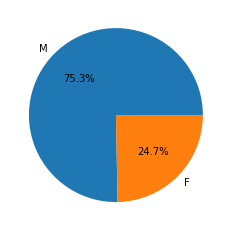

In [6]:
plt.pie(fdt_g,labels=fdt_g.index,autopct="%.1f%%")
plt.show()

# More male customers are attracted to our product 

In [7]:
pd.crosstab(data.Gender,data.Age,margins=True)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Gender,,,,,,,,
F,5083,24628,50752,27170,13199,9894,5083,135809
M,10019,75032,168835,82843,32502,28607,16421,414259
All,15102,99660,219587,110013,45701,38501,21504,550068


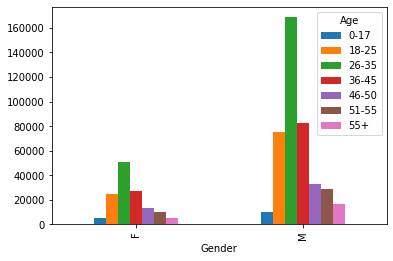

In [8]:
pd.crosstab(data.Gender,data.Age).plot(kind="bar")
plt.show()

1) MORE CUSTOMERS- 26-35 > 36-45 > 18-25 

2) LESS CUSTOMERS- 0-17M&F, 55+F

In [9]:
g=data.groupby("Gender")
g.sum()["Purchase"]

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

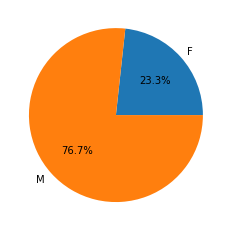

In [10]:
plt.pie(g.sum()["Purchase"],labels=g.sum()["Purchase"].index,autopct="%.1f%%")
plt.show()

# 
1.MALE spend & the no. of transactions is higher than FEMALE

In [11]:
data["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [12]:
data["Occupation"].value_counts().head(10)

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
Name: Occupation, dtype: int64

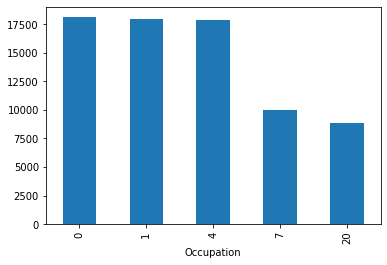

In [13]:
pd.crosstab(data["Occupation"],data["Gender"])["F"].sort_values(ascending=False).head().plot(kind="bar")
plt.show()

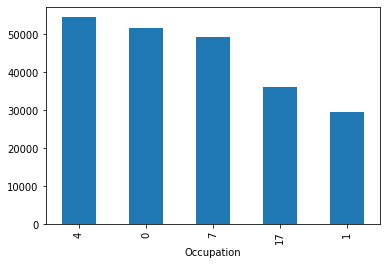

In [14]:
pd.crosstab(data["Occupation"],data["Gender"])["M"].sort_values(ascending=False).head().plot(kind="bar")
plt.show()

#

MALE occupation category 4th> 0th > 7th> 17th most likely to buy

FEMALE occupation category 0th > 1st> 4th> 7th most likely to buy

In [15]:
pd.crosstab(data.Gender,data.City)

City,Bangalore,Chennai,Hyderabad
Gender,,,
F,57796,42309,35704
M,173377,128866,112016


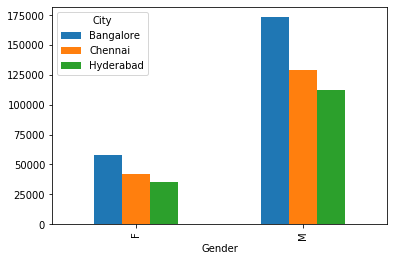

In [16]:
pd.crosstab(data.Gender,data.City).plot(kind="bar")
plt.show()

# Bangalore sales are doing good compared to Chennai & Hyderabad

In [17]:
pd.crosstab(data.City,data.Stay_In_Current_City_Years)

Stay_In_Current_City_Years,0,1,2,3,4+
City,,,,,
Bangalore,28687,83413,41772,42691,34610
Chennai,21533,61103,32952,27790,27797
Hyderabad,24178,49305,27114,24804,22319


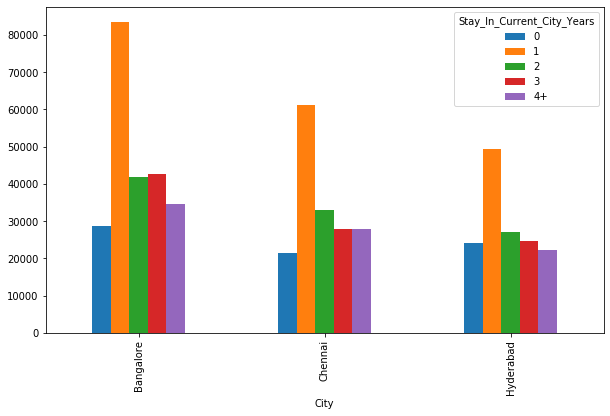

In [18]:
pd.crosstab(data.City,data.Stay_In_Current_City_Years).plot(kind="bar",figsize=(10,6))
plt.show()

# 
1) People staying for a year are mostly buying our products.

2) 4+ years are less interested, maybe they are involved with more trusted company

3) Freshers to a city to be targeted as there maynot know about the product at all 

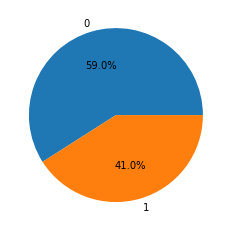

In [19]:
plt.pie(data["Marital_Status"].value_counts(),labels=data["Marital_Status"].value_counts().index,autopct="%.1f%%")
plt.show()

# 59% unmarried customers are interested in our product
Unmarried customers> Married customers

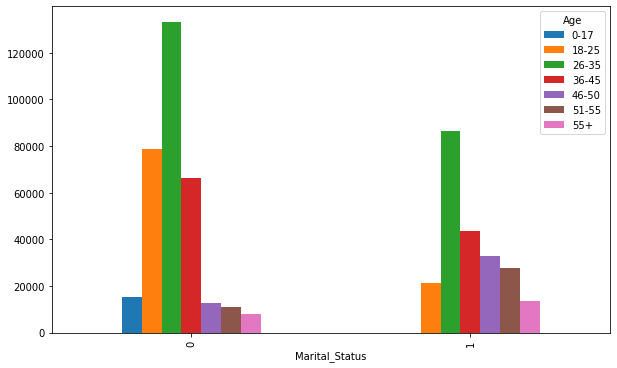

In [20]:
pd.crosstab(data.Marital_Status,data.Age).plot(kind="bar",figsize=(10,6))
plt.show()

# Married vs unmarried sharp decrease in higher age ranges

In [22]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

# Mean> Median
Positive skew --
outlier, more dispersed data

In [23]:
data["Purchase"].mode()

0    7011
dtype: int64

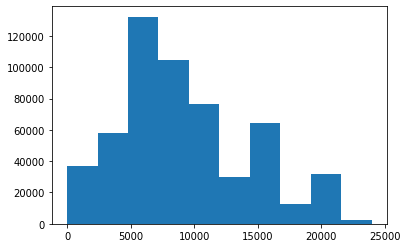

In [24]:
plt.hist(data.Purchase)
plt.show()

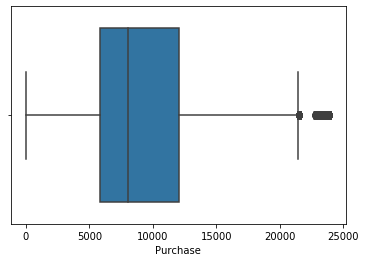

In [25]:
sbn.boxplot(data.Purchase)
plt.show()

# Most customers spend between 5K & 12K 
1) Average purchase amount= 8047

2) Most purchase amt= 7011


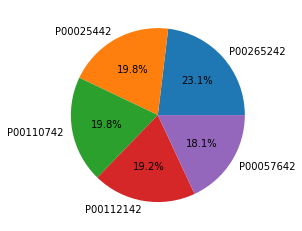

In [29]:
plt.pie(data["Product_ID"].value_counts().head(5),labels=data["Product_ID"].value_counts().head(5).index,autopct="%.1f%%")
plt.show()

# 
P00265242 is the best selling product followed by P00025442 & P00110742

# Product ID & Gender

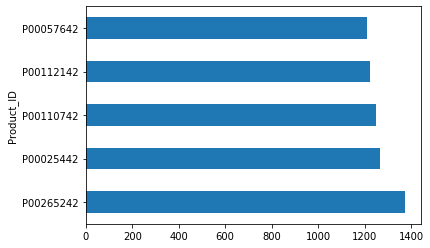

In [31]:
pd.crosstab(data["Product_ID"],data["Gender"])["M"].sort_values(ascending=False).head().plot(kind="barh")
plt.show()

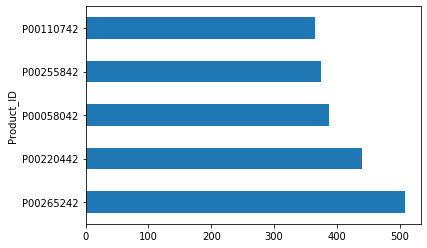

In [32]:
pd.crosstab(data["Product_ID"],data["Gender"])["F"].sort_values(ascending=False).head().plot(kind="barh")
plt.show()

# 

AMONG FEMALES PRODUCT ID P00220442 & P00058042 ARE LIKABLE

In [37]:
oc_purchase=data.groupby("Occupation").sum()["Purchase"].head(6).sort_values(ascending=False)
oc_purchase

Occupation
4    666244484
0    635406958
1    424614144
2    238028583
3    162002168
5    113649759
Name: Purchase, dtype: int64

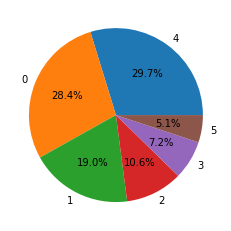

In [39]:
plt.pie(oc_purchase,labels=oc_purchase.index,autopct="%.1f%%")
plt.show()

# Spend amount is more for occupation category 4 > 0 > 1